# 1)
Importez les données du fichier Openhealth_S-Grippal.csv. Consultez http://www.openhealth.fr/ias pour plus d’information sur les données. Affichez les 5 premières lignes du jeu de données. On va travailler seulement avec la variable IAS_brut, sous la forme d’une série temporelle, dont on précisera la fréquence d’échantillonage et les dates de début et de fin. Pour cette variable, dans ce jeu de données, les cas de nullité correspondent à des données manquantes. Combiende données manquantes comporte-t-elle ? Pour les traitements des questions suivantes, éliminez les données manquantes par imputation, c’est-à-dire en déduisant une valeur plus “raisonnable” aux dates non-observées à partir des valeurs aux dates observées : par exemple par la moyenne de deux dates les
plus proches.

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [154]:
data = pd.read_csv("OpenhealthS-Grippal.csv",delimiter=";")

In [155]:
data[0:5]

,PERIODE,IAS_brut,IAS_lisse,Incidence_Sentinelles
0,2009-07-01,"1,7","2,2","2,3"
1,2009-07-02,"3,4","2,1","2,3"
2,2009-07-03,"2,1","2,1","2,3"
3,2009-07-04,"1,3",2,"2,3"
4,2009-07-05,"14,2",2,"2,3"


La fréquence d'échantillonage est journalière.

In [156]:
print("La date de début d'échantillonage est {}.".format(data["PERIODE"][0]))
print("La date de fin d'échantillonage est {}.".format(data["PERIODE"][len(data)-1]))

La date de début d'échantillonage est 2009-07-01.
La date de fin d'échantillonage est 2014-04-17.


In [157]:
print("Le nombre de valeurs manquantes est {}.".format(data['IAS_brut'][data['IAS_brut']=="0"].count()))

Le nombre de valeurs manquantes est 8.


In [158]:
data['IAS_brut']=data['IAS_brut'].replace(',','.',regex=True)

In [159]:
data['IAS_brut']=data['IAS_brut'].astype(float)

In [160]:
data['IAS_brut']=data['IAS_brut'].replace(0.0, np.nan)

In [161]:
data['IAS_brut'].isnull().sum() # on vérifie qu'on a bien le même nombre de valeurs manquantes

8

In [162]:
data['IAS_brut']=data['IAS_brut'].interpolate()

In [163]:
data['IAS_brut'].isnull().sum() # on vérifie qu'on n'a plus de valeur manquante

0

# 2)
Tracez la série temporelle considérée en fonction du temps. Commentez brièvement ce que vous
observez.

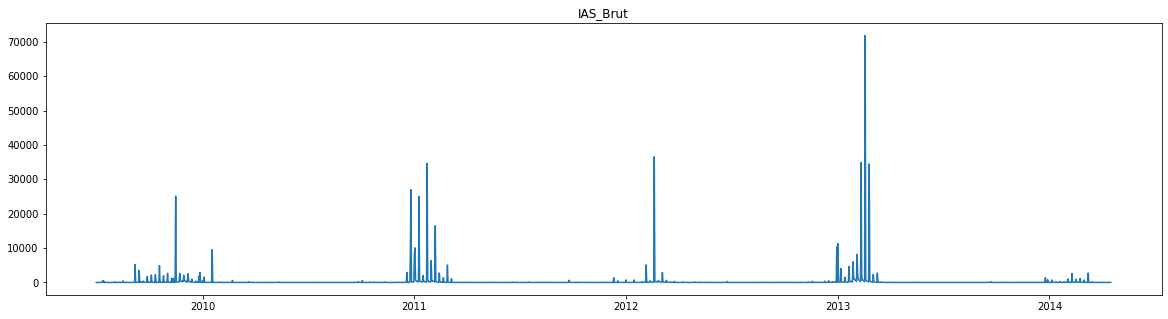

In [172]:
plt.figure(figsize=(20,5))
data['PERIODE'] = pd.to_datetime(data['PERIODE'])
plt.plot(data['PERIODE'].values, data['IAS_brut'].values)
plt.title("IAS_Brut")
plt.show()

"L’IAS® Allergies permet d’analyser le niveau des pathologies allergiques en France au jour le jour."

On remarque que le niveau d'allergie est saisonnier et qu'il est surtout fort en fin/début d'année (période d'hiver).

# 3)
Tracez l’histogramme de la loi marginale. Quel impact la distribution observée par l’histogramme a sur la trajectoire représentée à la question précédente?

(array([1.736e+03, 7.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.000000e-01, 7.185270e+03, 1.437044e+04, 2.155561e+04,
        2.874078e+04, 3.592595e+04, 4.311112e+04, 5.029629e+04,
        5.748146e+04, 6.466663e+04, 7.185180e+04]),
 <a list of 10 Patch objects>)

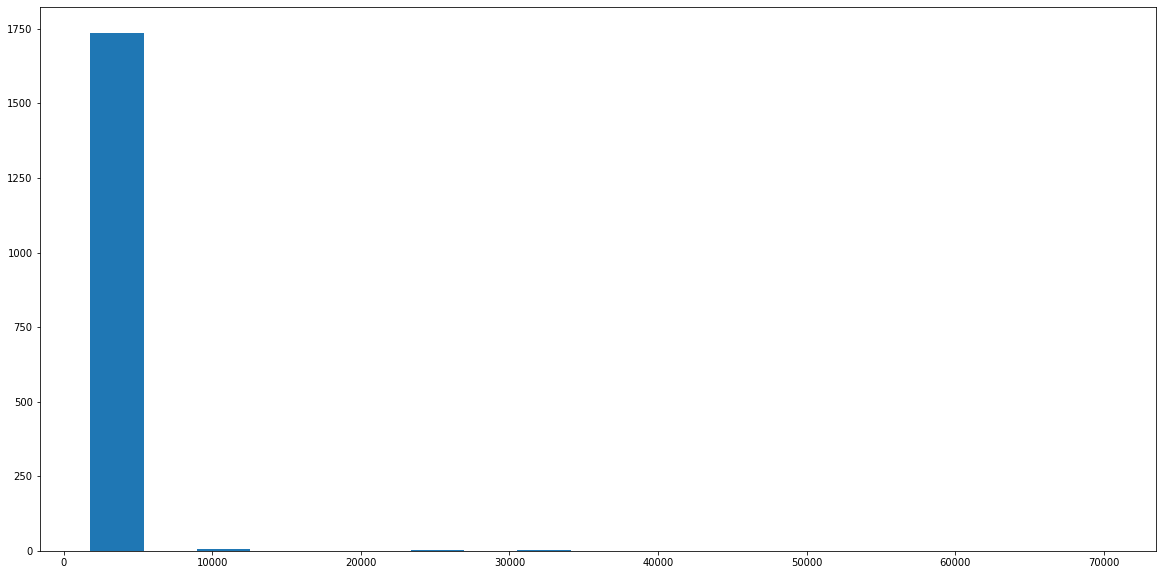

In [183]:
plt.figure(figsize=(20,10))
plt.hist(data['IAS_brut'], rwidth=0.5)

On remarque qu'une faible proportion des données sont très élevées (>10000), mais suffisament pour s'assurer qu'il ne s'agit pas de valeurs aberrantes. Ceci a pour effet d'aplatir fortement toutes les valeurs faibles.

# 4)
Reprenez les questions précédentes après tranformations des observations par le logarithme naturel. Commentez.

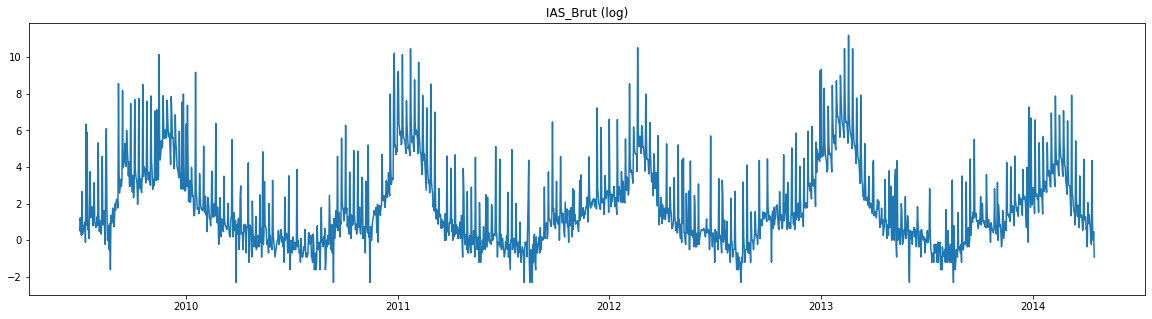

In [202]:
plt.figure(figsize=(20,5))
data['PERIODE'] = pd.to_datetime(data['PERIODE'])
plt.plot(data['PERIODE'].values, np.log(data['IAS_brut'].values))
plt.title("IAS_Brut (log)")
plt.show()

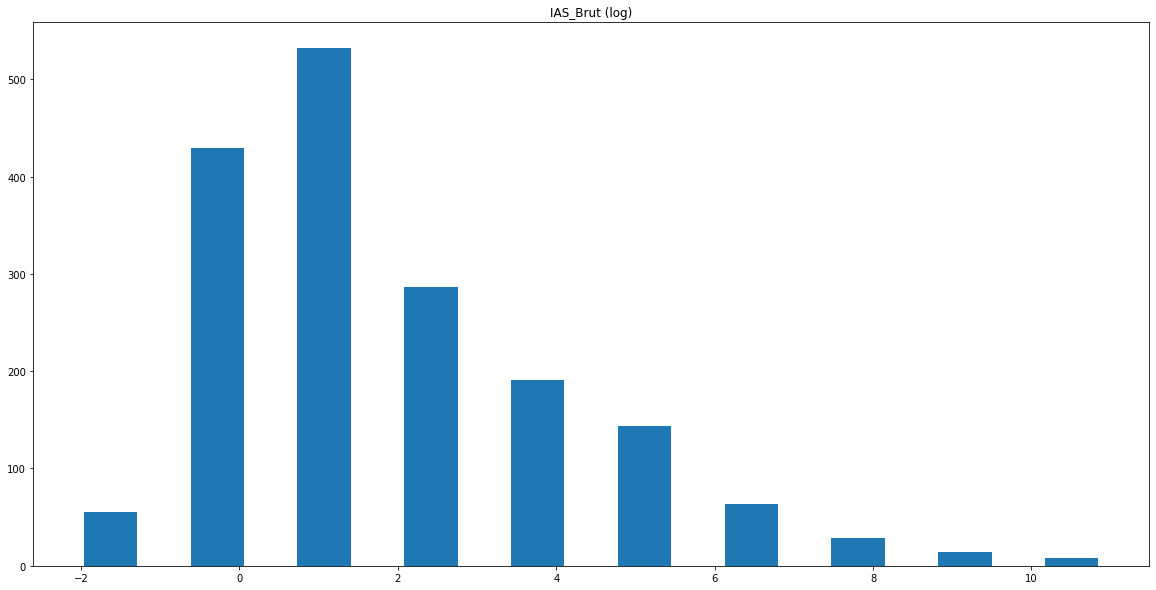

In [203]:
plt.figure(figsize=(20,10))
plt.hist(np.log(data['IAS_brut']), rwidth=0.5)
plt.title("IAS_Brut (log)")
plt.show()

La transformée logarithmique donne des résultats plus explicites.

"Le logarithme a pour effet de pénaliser les riches et de favoriser les pauvres."

Cependant, les valeurs très faibles (en dessous de zéro) apparaissent maintenant négatives.

# 5)
En utilisant signal.periodogram() (du package signal importé depuis scipy), tracez le périodogramme des données. Expliquez les pics les plus significatifs que vous observez. Attention au fait que dans la communauté signal les spectres sont normalisées pour des fréquences absolues dans $[-1/2,1/2]$ plutôt que $[-\pi,\pi]$.

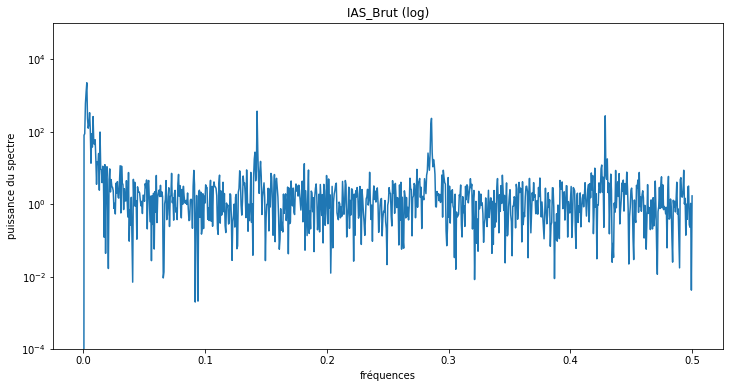

In [207]:
plt.figure(figsize=(12,6))
f, Pxx_den = signal.periodogram(np.log(data['IAS_brut']))
plt.semilogy(f, Pxx_den)
plt.ylim([10e-5, 10e+4])
plt.title("IAS_Brut (log)")
plt.xlabel("fréquences")
plt.ylabel("puissance du spectre")
plt.show()

<u>Interprétation</u>: les pics se situent sur les fréquences pour lesquelles la périodicité est forte.

# 6)
Pour supprimer une tendance périodique de période $T$ dans un signal $(x_t)_{t \in \mathbb{Z}}$ il suffit d’appliquer le filtre $\Delta_T$ défini par:

$$[\Delta_Tx]_t = x_t − x_{t−T}$$

Utilisez cette méthode pour supprimer la tendance périodique de période 1 an. Quel pic du périodogramme cette méthode a fait disparaître ?